In [ ]:
!nvidia-smi ### The GPU in which the model is trained at is very important to the system and how it runs

Thu Oct 30 01:59:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   34C    P0             56W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# importing some content
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)
# This is meant to install YOLOv8 dependencies

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Setup complete ✅ (12 CPUs, 167.1 GB RAM, 40.0/235.7 GB disk)


In [ ]:
# Setup and import some functions from these functions
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# This is for downloading datasets and importing from RoboFlow

%cd {HOME}
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="ACTIVE API KEY HERE")
project = rf.workspace("ecen-403").project("ecen404_deploymenttest-an0qi")
version = project.version(3)
dataset = version.download("yolov8")


/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 139.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ECEN404_DeploymentTest-3 in yolov8:: 100%|██████████| 44444/44444 [00:08<00:00, 5394.21it/s]


In [ ]:
# This is meant to run the yolo model using the ultralytics imported module
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=90 imgsz=960 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 175MB/s]
New https://pypi.org/project/ultralytics/8.3.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ECEN404_DeploymentTest-3/data.yaml, epochs=90, time=None, patience=100, batch=16, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agno

/content


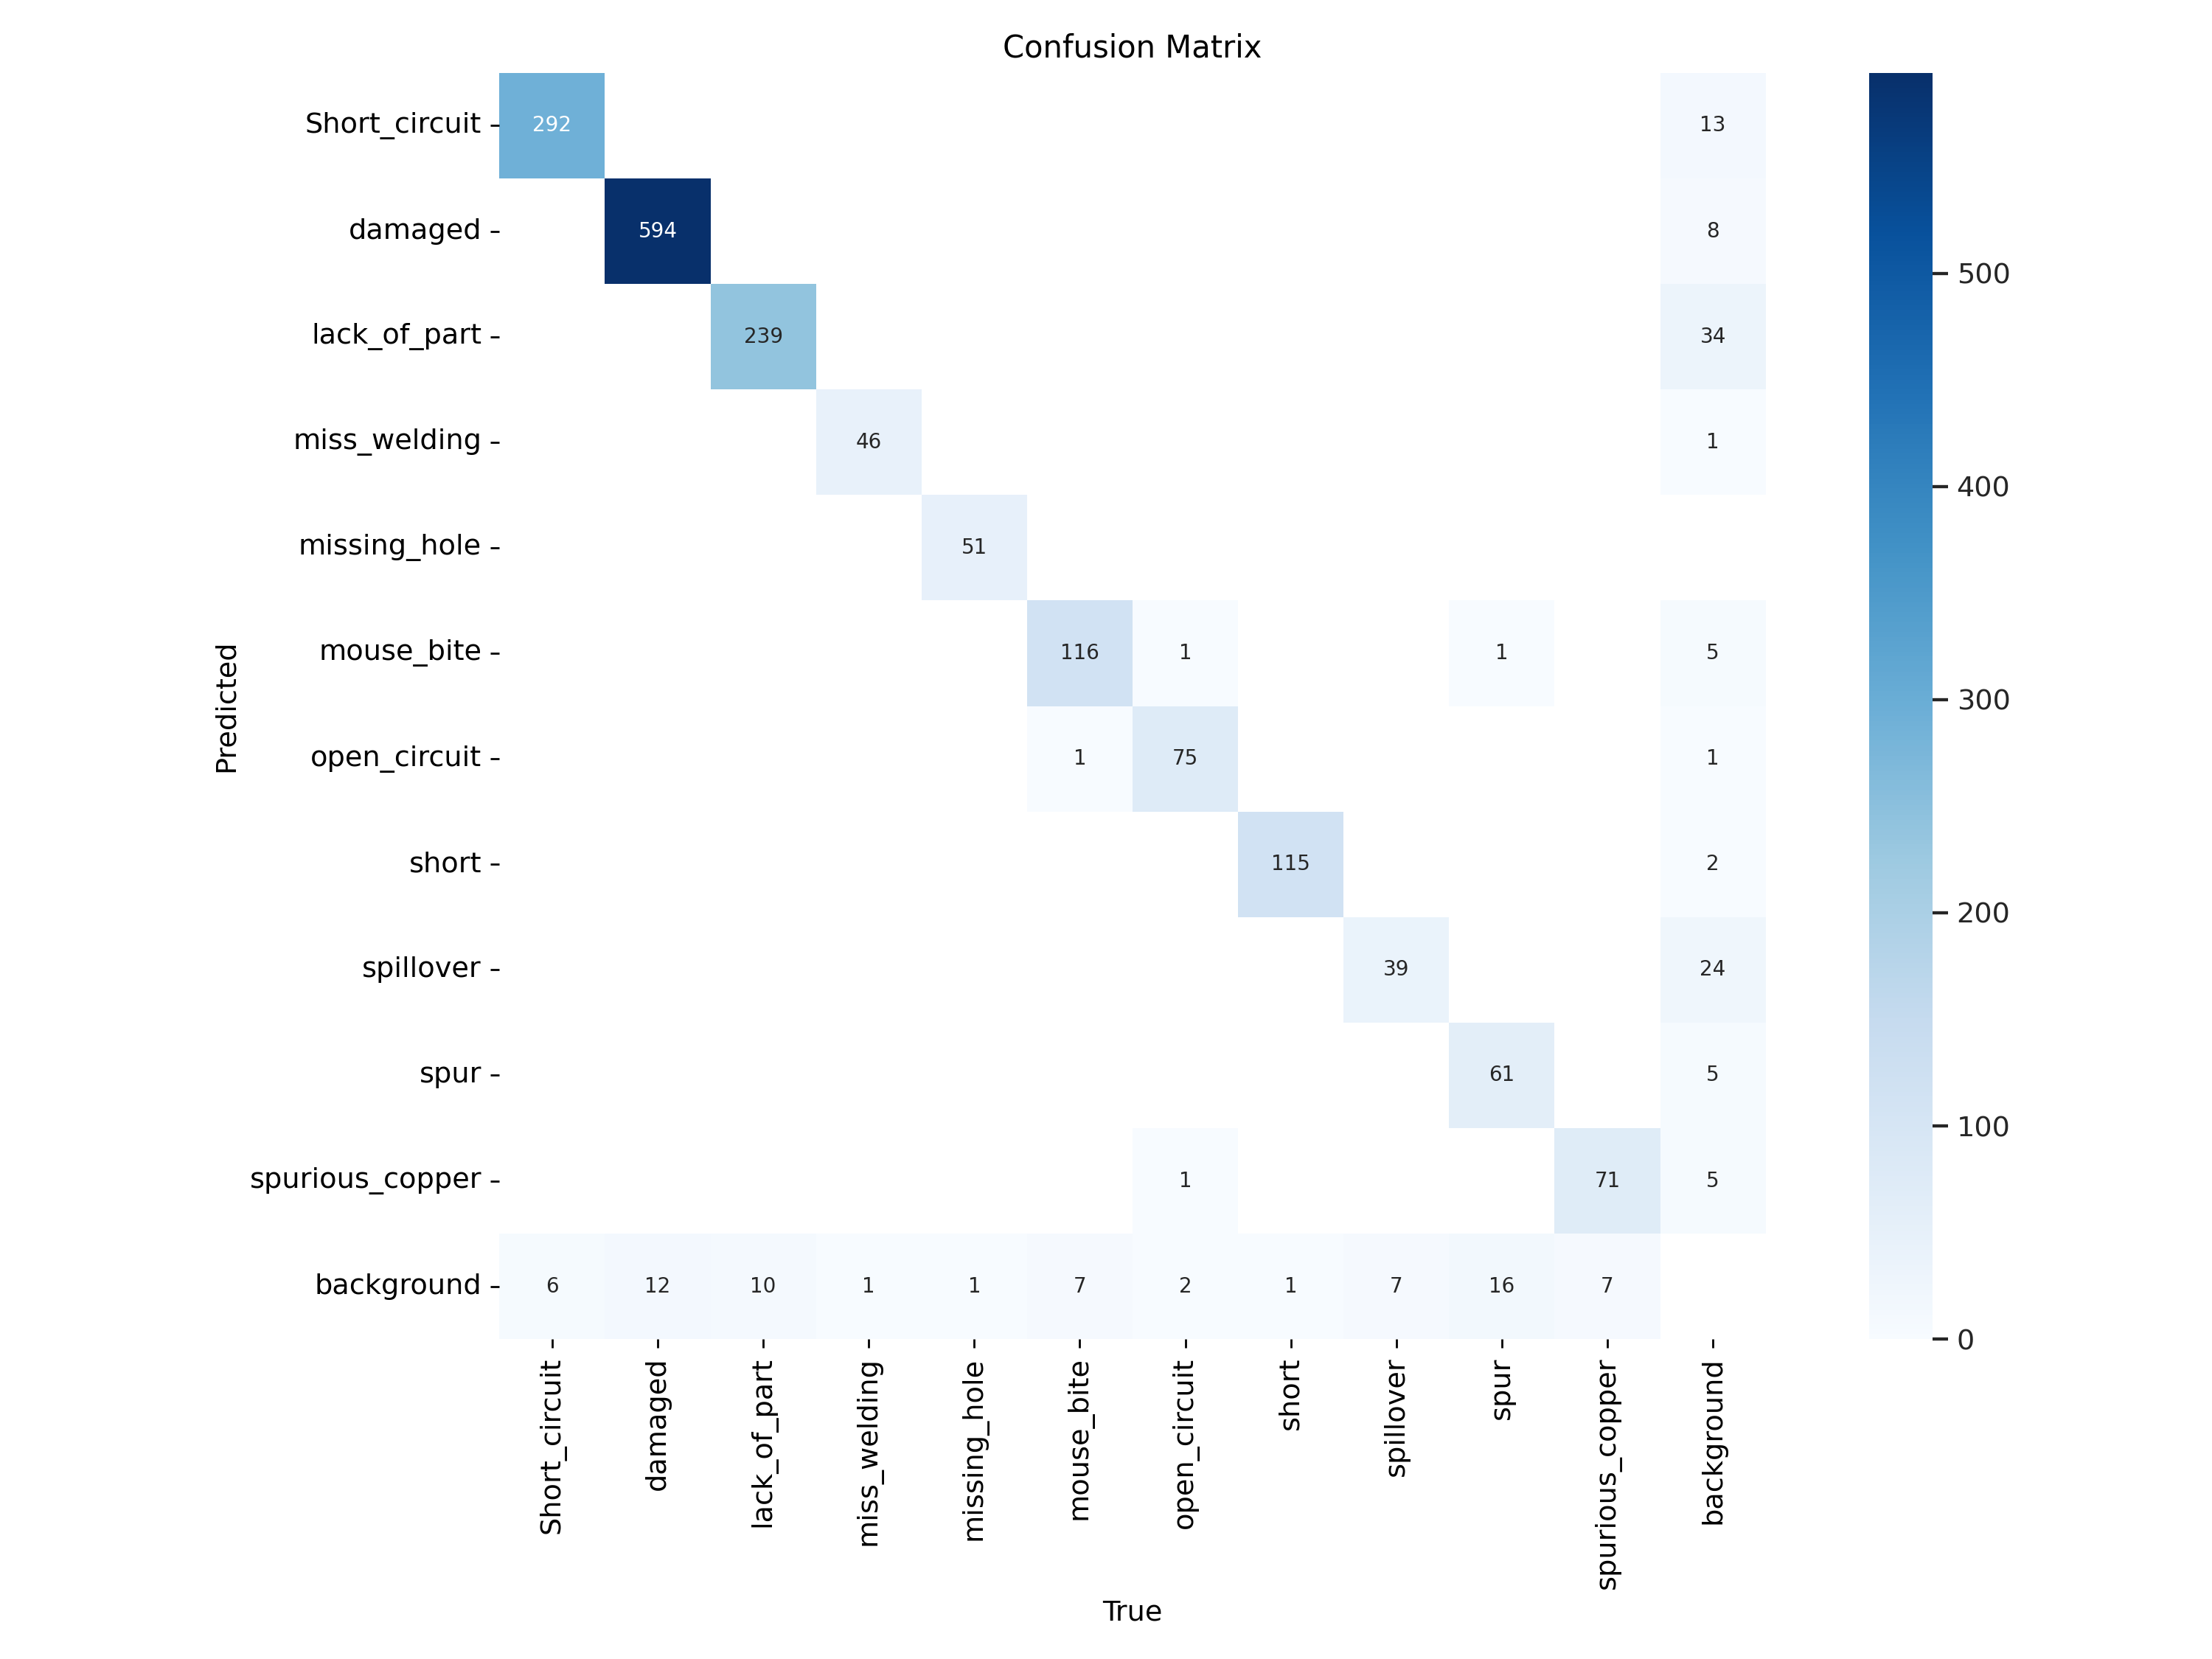

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


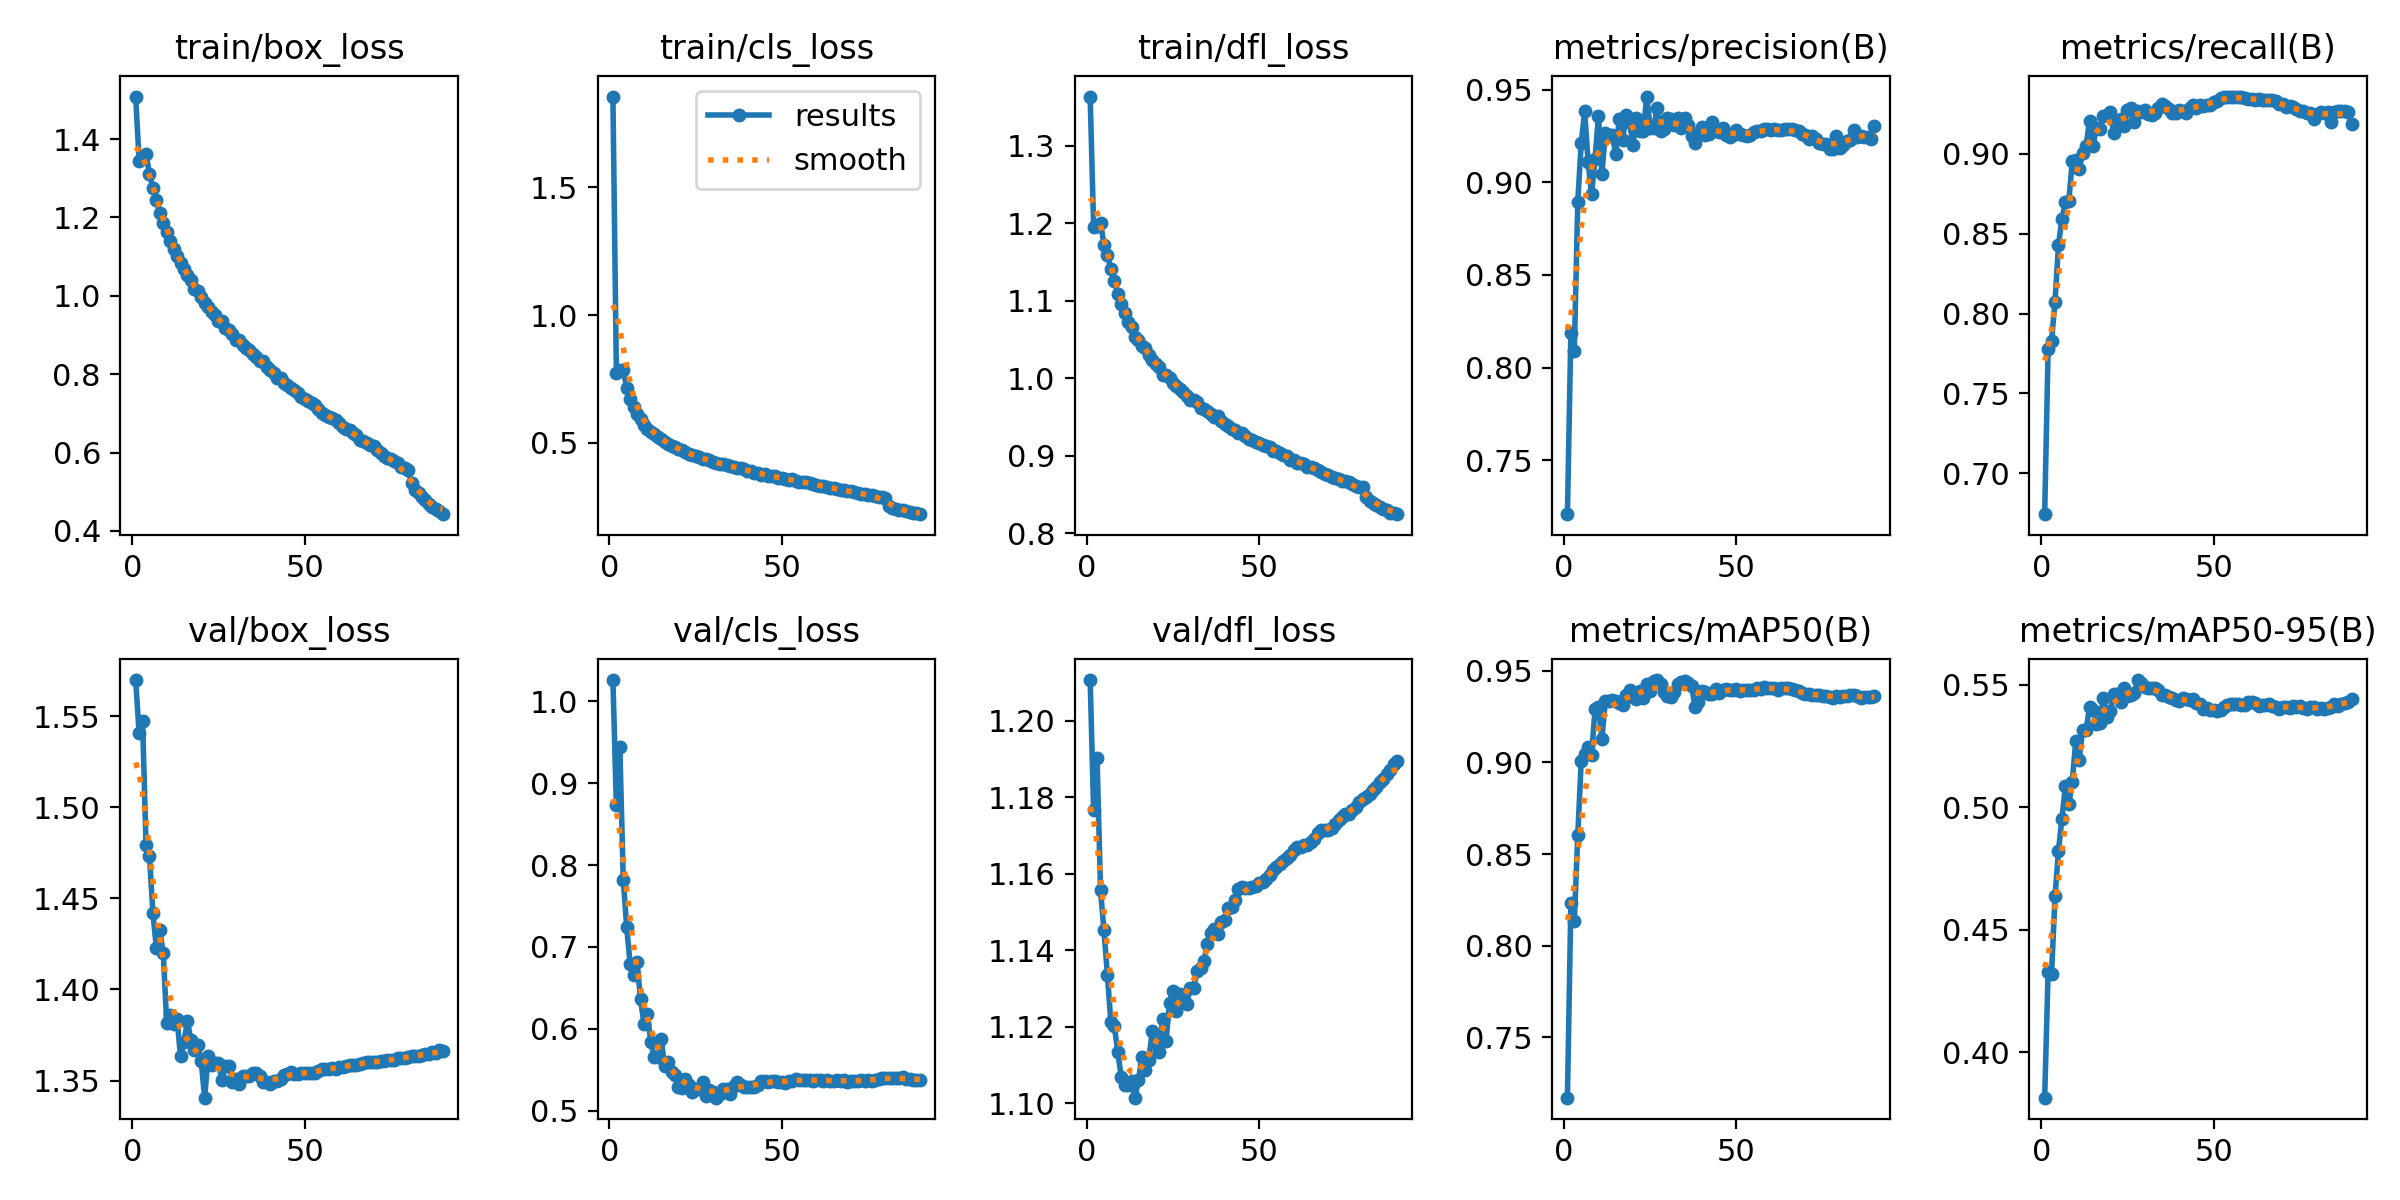

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/ECEN404_DeploymentTest-3/valid/labels.cache... 490 images, 0 backgrounds, 0 corrupt: 100% 490/490 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8, len(boxes) = 1773. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:04<00:00,  6.67it/s]
                   all        490       1773      0.928      0.929      0.943      0.552
         Short_circuit         98        298      0.961      0.977      0.984      0.685
               damaged        199        606       0.99      0.979      0.987      0.709
     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r runs/detect/train /content/drive/MyDrive/

In [ ]:
!cp -r runs/detect/val /content/drive/MyDrive/


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.375 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs

image 1/231 /content/ECEN404_DeploymentTest-3/test/images/01PCBA-Hole_13_jpg.rf.9ea660bdb2ea7af7fdeaef20a2139b56.jpg: 960x960 2 damageds, 7.4ms
image 2/231 /content/ECEN404_DeploymentTest-3/test/images/01PCBA-Hole_13_jpg.rf.c0ff91491cb121eb74ecc85927ca89e3.jpg: 960x960 4 damageds, 7.2ms
image 3/231 /content/ECEN404_DeploymentTest-3/test/images/01PCBA-Hole_14_jpg.rf.21bfc98069919283deeaa29c8777dfda.jpg: 960x960 3 damageds, 6.6ms
image 4/231 /content/ECEN404_DeploymentTest-3/test/images/01PCBA-Hole_5_jpg.rf.0bc2be2c097c00a9dc0c48a24d7af6bb.jpg: 960x960 4 damageds, 6.8ms
image 5/231 /content/ECEN404_DeploymentTest-3/test/images/01PCBA-Hole_8_jpg.rf.30abfb7fcceb36309bbb860137f7b04a.jpg: 960x960 4 damageds, 6.4ms
image 6/231 /content/ECEN404_DeploymentTest-3/test/images/01PCBA-Hole_8_jpg.rf.56b72819c

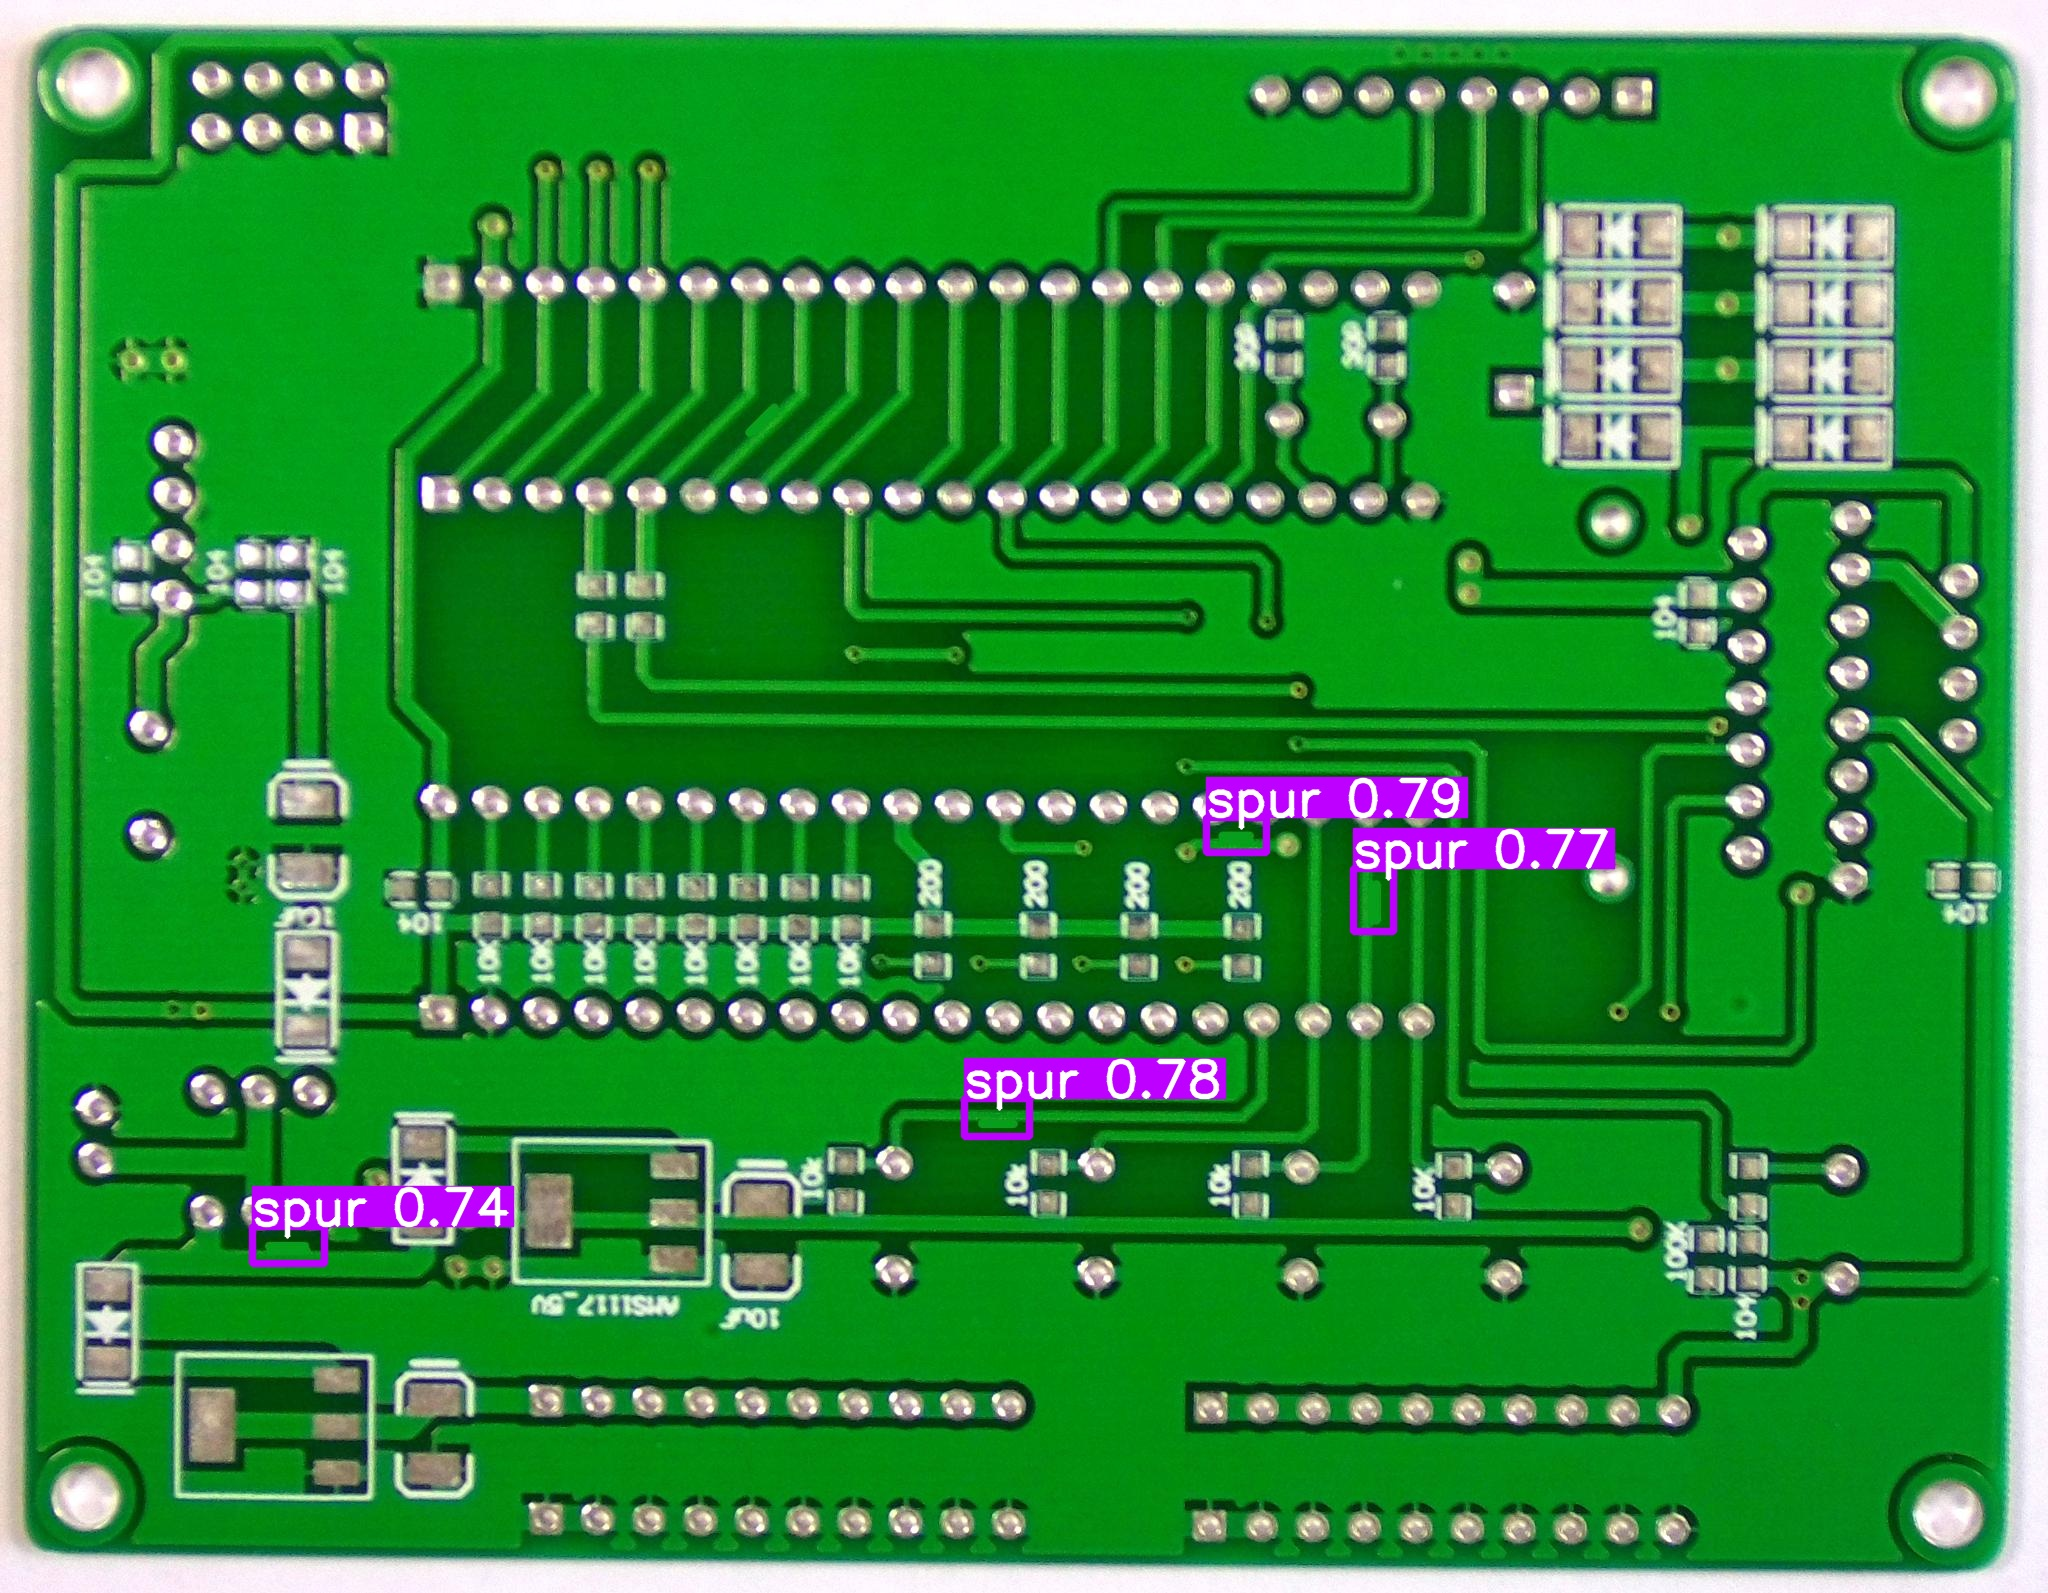

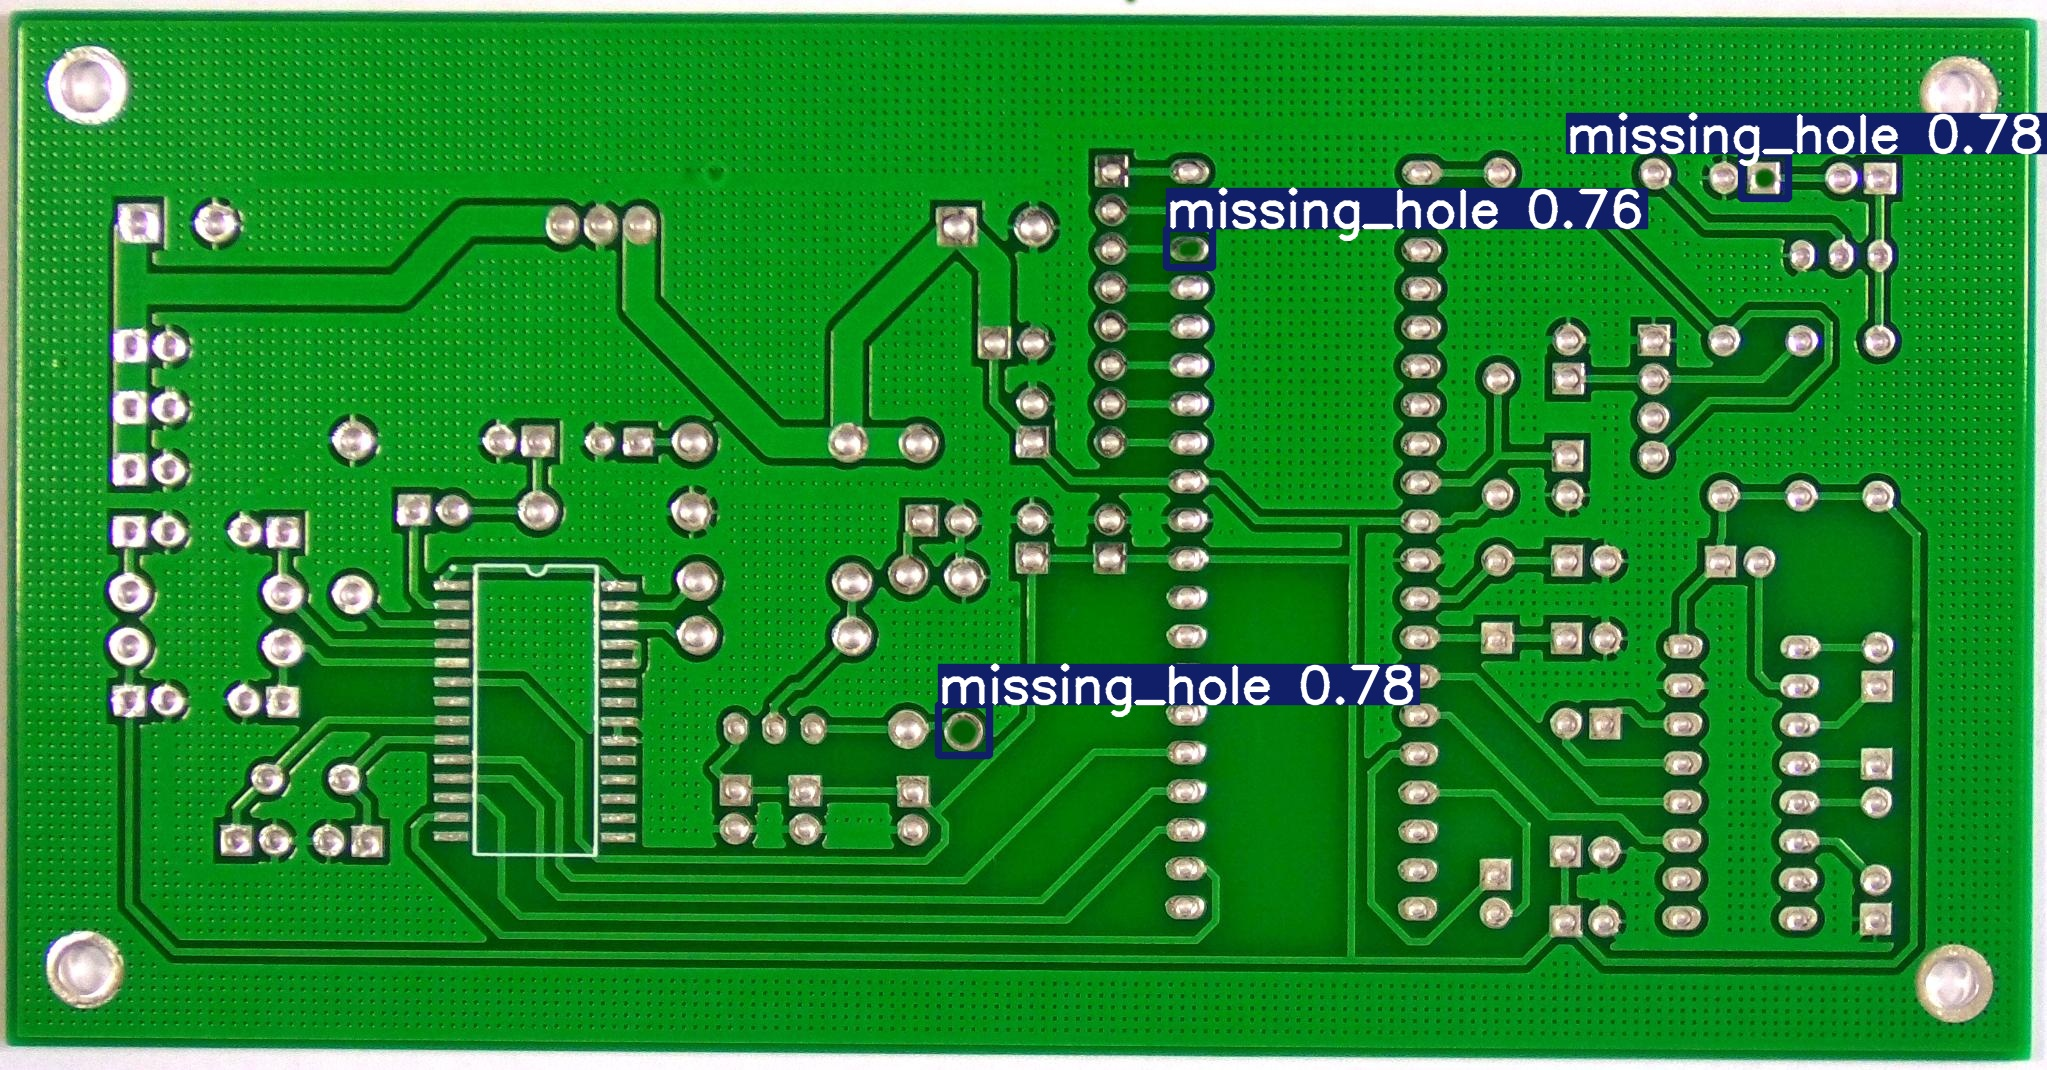

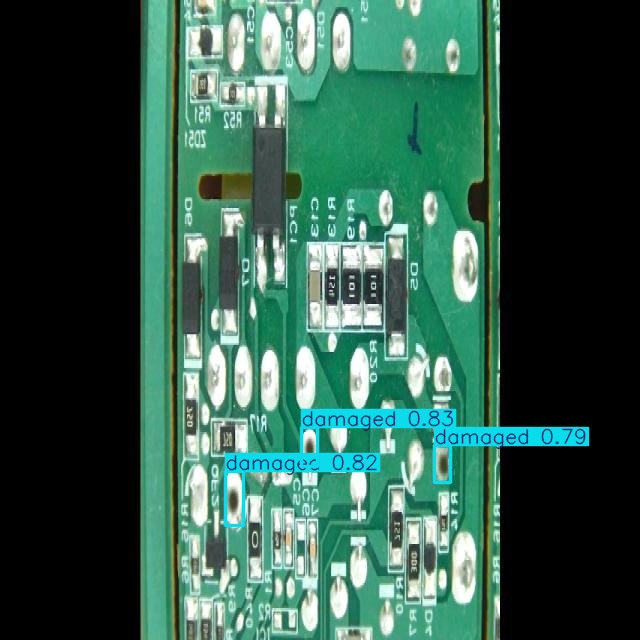

In [ ]:
#This block of code is meant to open and show seperate images of example outputs from the model of the training and validation sets
import glob
from IPython.display import Image, display

base_path = '/content/runs/detect'

subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

latest_folder = max(subfolders, key=os.path.getmtime)
image_paths = glob.glob(f"{latest_folder}/*.jpg")[:3]

for image_path in image_paths:
  display(Image(filename=image_path, width=600))
  print('\n')

/content


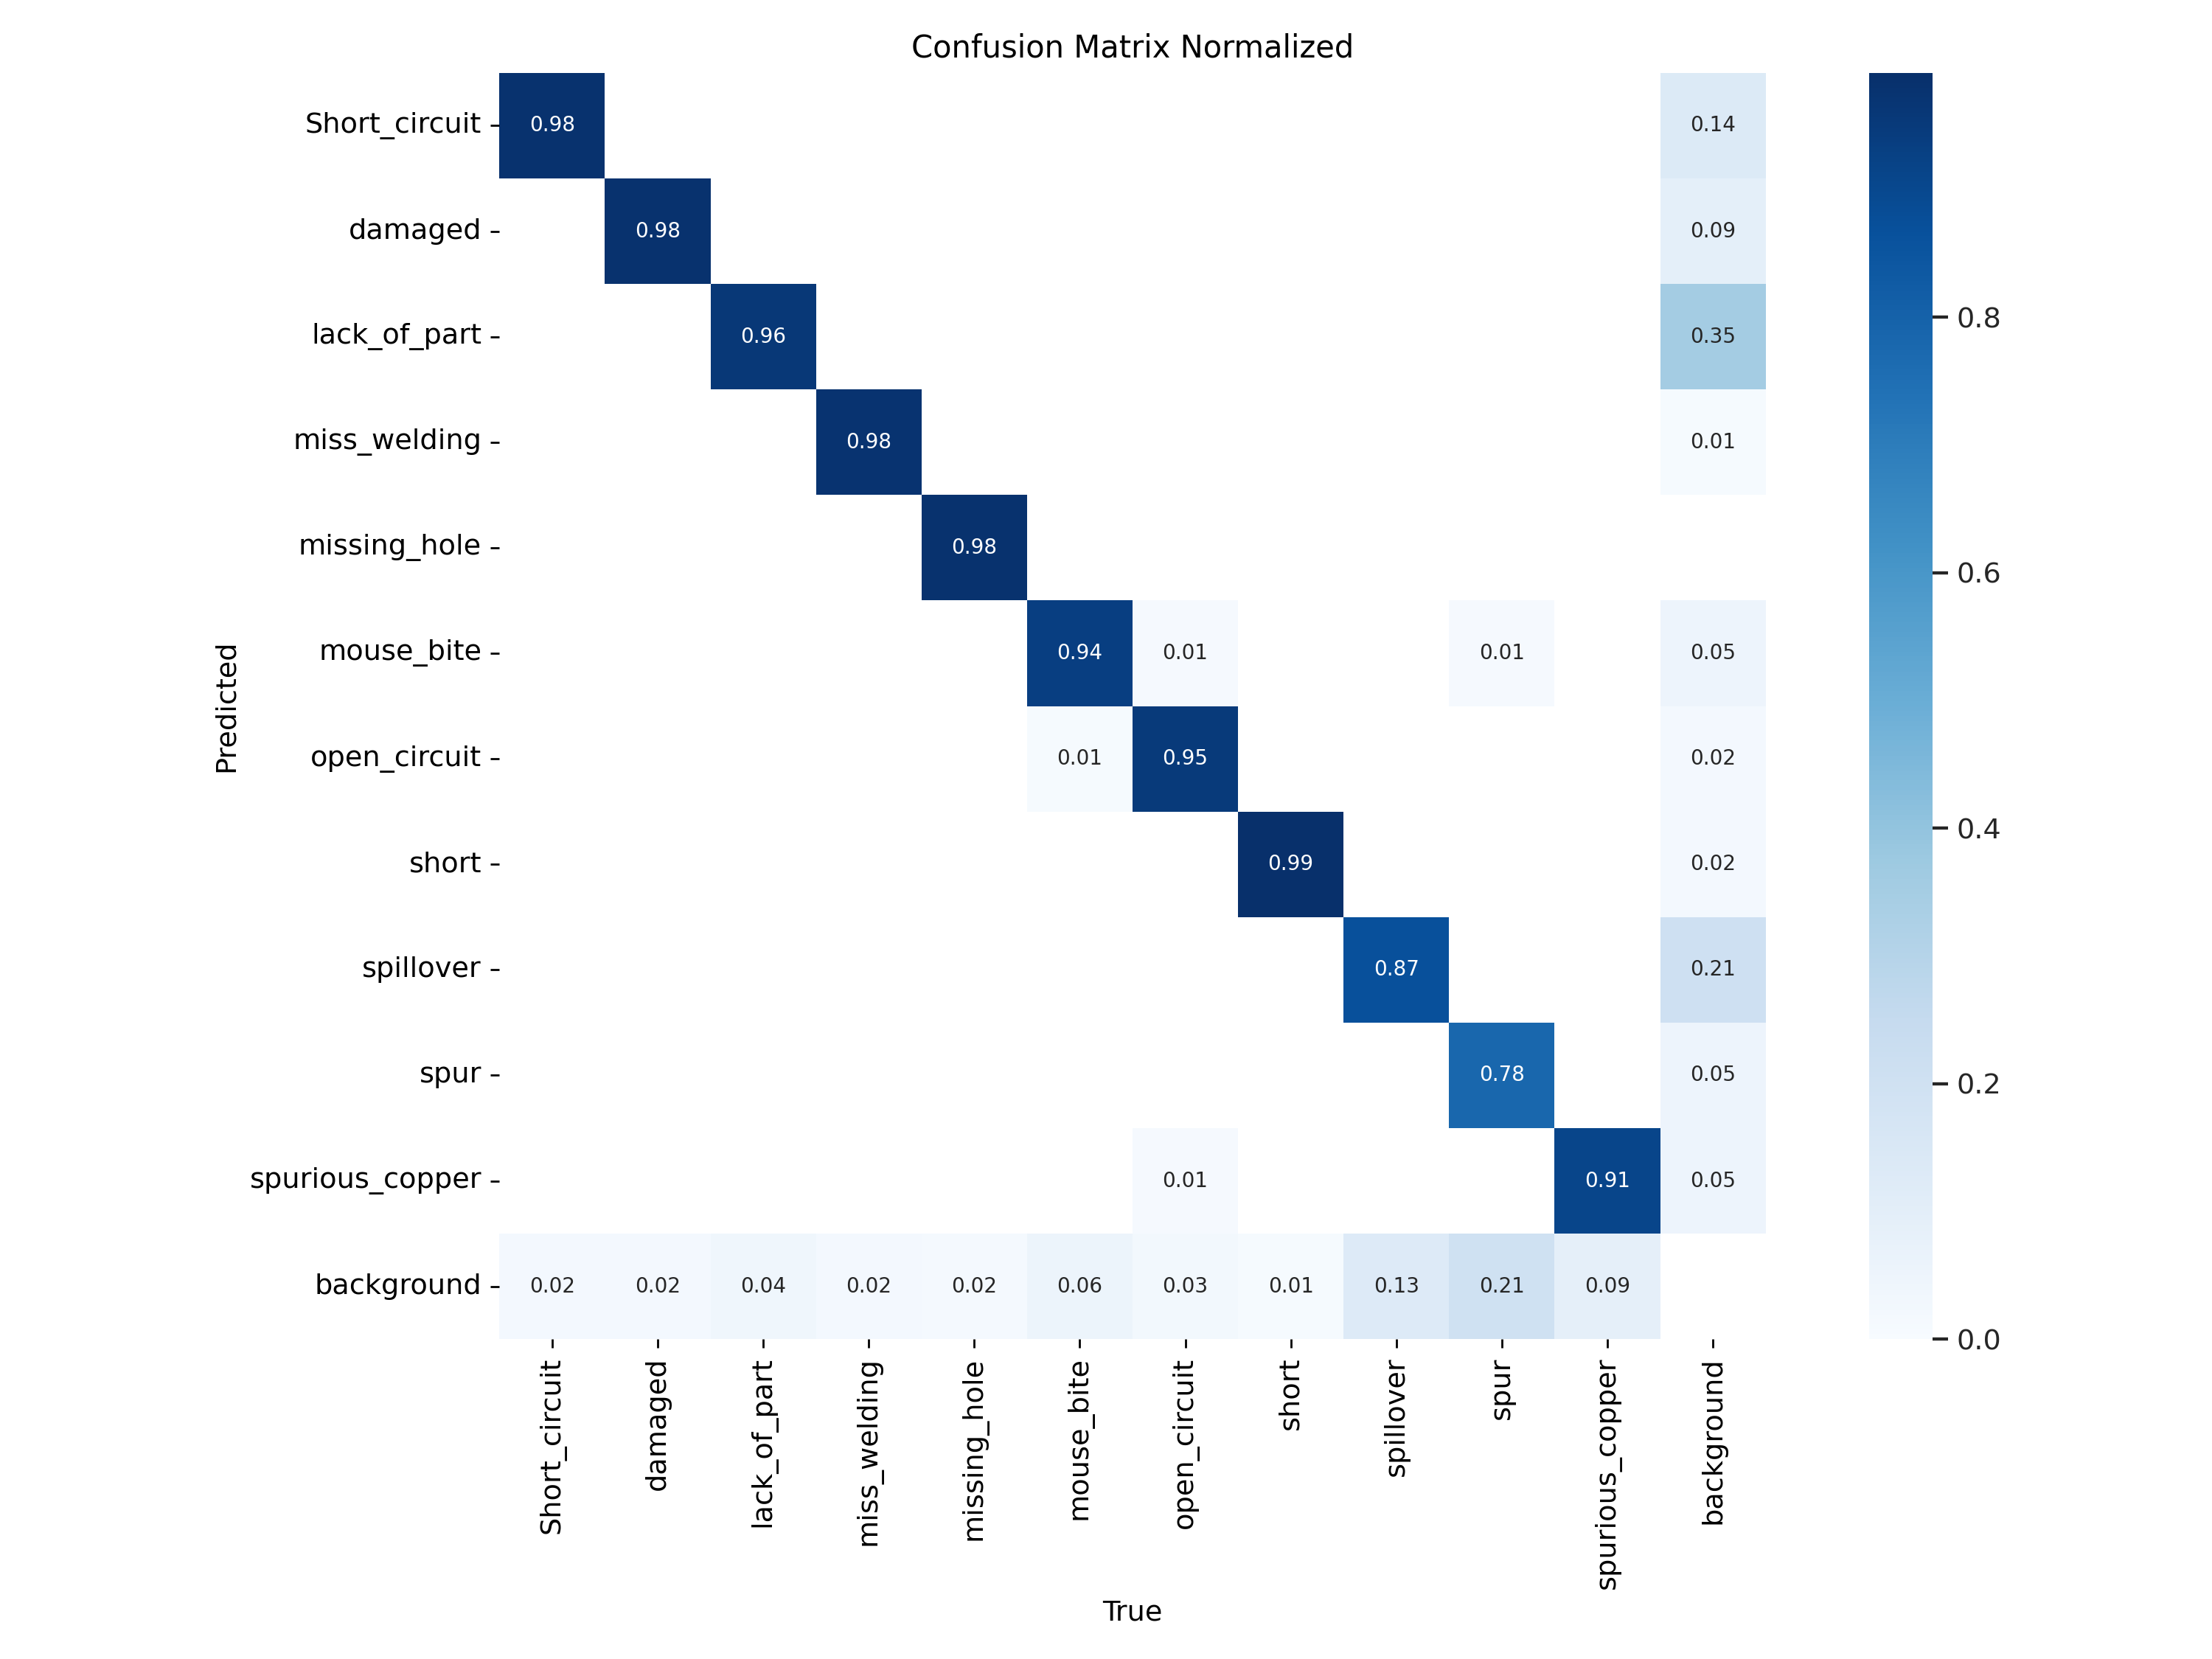

In [ ]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/val/confusion_matrix_normalized.png', width=800)

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/ecen-403/ecen404_deploymenttest-an0qi/3
Share your model with the world at: https://universe.roboflow.com/ecen-403/ecen404_deploymenttest-an0qi/model/3


### Credits to https://github.com/Ironbrotherstyle/PCB-DATASET\
### Credits to https://universe.roboflow.com/nbmachinevision/pcb-defect-vagef      

### License: https://creativecommons.org/licenses/by/4.0/

***Changes were made to the datasets by augmenting images with noise and blur

Citation #1: PCBDEFECTS. (February 2025). PCB DEFECTS Dataset. Roboflow Universe, Roboflow. Retrieved December 1, 2025, from https://universe.roboflow.com/pcbdefects-sini6/pcb-defects-2soi7

Citation #2: **NBMachineVision.** (April 2024). *PCB Defect Dataset*. Roboflow Universe, Roboflow. Retrieved December 1, 2025, from [https://universe.roboflow.com/nbmachinevision/pcb-defect-vagef](https://universe.roboflow.com/nbmachinevision/pcb-defect-vagef)

***

Link to Roboflow Dataset: https://app.roboflow.com/ecen-403/ecen404_deploymenttest-an0qi/models


MIT License

Copyright (c) [2025] [Timothy Yaejun Lee]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.